In [ ]:
fimport pandas as pd
import numpy as np

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_2v.csv to train_2v (1).csv


In [ ]:
data = pd.read_csv("train_2v.csv")
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
data.shape

(43400, 12)

In [ ]:
data = data.drop(columns='id' )
data.shape

(43400, 11)

In [ ]:
data = data[data.gender != 'Other']
data.shape

(43389, 11)

In [ ]:
data.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1458
smoking_status       13290
stroke                   0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeb0c97a20>]],
      dtype=object)

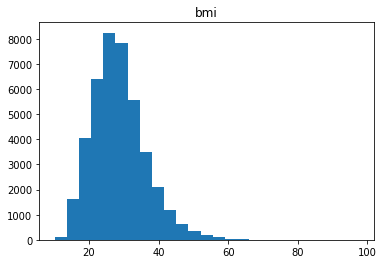

In [ ]:
data.hist(column='bmi',grid=False, bins = 25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1c981c88>]],
      dtype=object)

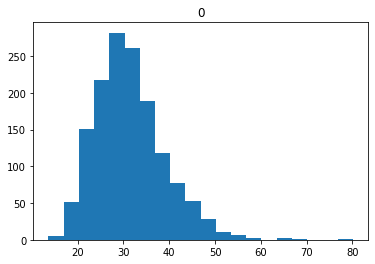

In [ ]:
from random import seed
seed(1)
d = data.dropna(subset = ['bmi'])
values,indices=np.histogram(d.bmi,bins=25)
values=values.astype(np.float32)
weights=values/np.sum(values)

weights=values/np.sum(values)
new_random=np.random.choice(indices[1:],1458,p=weights)
m = pd.DataFrame(new_random)
m.hist(grid = False, bins = 20)

In [ ]:
m.shape

(1458, 1)

In [ ]:
data.loc[data.bmi.isnull(),'bmi'] = m.values.tolist()


In [ ]:
data.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13290
stroke                   0
dtype: int64

In [ ]:
data_No_smoking_status = data[data.smoking_status.isnull()]
data_smoking_status = data.dropna(subset = ['smoking_status'])
data_No_smoking_status = data_No_smoking_status.drop(columns=['smoking_status'])

In [ ]:
data_No_smoking_status.head(2)
data_No_smoking_status.shape

(13290, 10)

In [ ]:
data_smoking_status.head(2)
data_No_smoking_status.shape

(13290, 10)

In [ ]:
data_No_smoking_status['gender'] = data_No_smoking_status['gender'].astype('category').cat.codes

data_No_smoking_status['ever_married'] = data_No_smoking_status['ever_married'].astype('category').cat.codes

data_No_smoking_status['work_type'] = data_No_smoking_status['work_type'].astype('category').cat.codes

data_No_smoking_status['Residence_type'] = data_No_smoking_status['Residence_type'].astype('category').cat.codes

In [ ]:
data_No_smoking_status.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0
5,0,47.0,0,0,1,2,1,210.95,50.1,0
10,0,79.0,0,0,1,0,1,77.08,35.0,0


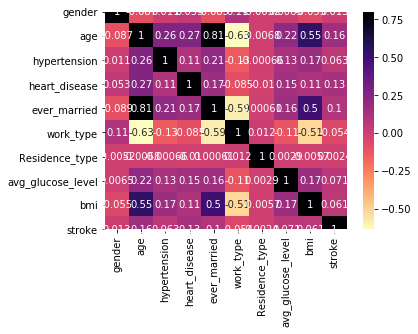

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.cubehelix_r
corrmatrix = data_smoking_status.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True, cmap = 'magma_r',annot=True)
#corrmatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
data_smoking_status['gender'] = data_smoking_status['gender'].astype('category').cat.codes
data_smoking_status['ever_married'] = data_smoking_status['ever_married'].astype('category').cat.codes
data_smoking_status['work_type'] = data_smoking_status['work_type'].astype('category').cat.codes
data_smoking_status['Residence_type'] = data_smoking_status['Residence_type'].astype('category').cat.codes
data_smoking_status['smoking_status'] = data_smoking_status['smoking_status'].astype('category').cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [ ]:
data_smoking_status.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
labels_No_smoke = data_No_smoking_status.columns[0:-1]

X_No_smoke = data_No_smoking_status[labels_No_smoke]
y_No_smoke = data_No_smoking_status['stroke']

X_train_No_smoke, X_test_No_smoke, y_train_No_smoke, y_test_No_smoke = train_test_split(X_No_smoke, y_No_smoke, test_size=0.1, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_No_smoke)
X_train_No_smoke = scaler.transform(X_train_No_smoke)
X_test_No_smoke = scaler.transform(X_test_No_smoke)

In [ ]:
labels_smoke = data_smoking_status.columns[0:-1]

X_smoke = data_smoking_status[labels_smoke]
y_smoke = data_smoking_status['stroke']

X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = train_test_split(X_smoke, y_smoke, test_size=0.1, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_smoke)
X_train_smoke = scaler.transform(X_train_smoke)
X_test_smoke = scaler.transform(X_test_smoke)

In [ ]:
pd.DataFrame(X_train_No_smoke).head()

,0,1,2,3,4,5,6,7,8
0,-0.904465,-0.816432,-0.203581,-0.173108,-0.827148,1.006202,-0.993085,2.195273,-1.237409
1,-0.904465,-0.977387,-0.203581,-0.173108,-0.827148,1.006202,-0.993085,-0.458181,0.375926
2,-0.904465,-0.977387,-0.203581,-0.173108,-0.827148,1.006202,1.006963,-0.862791,-1.286671
3,-0.904465,0.793118,-0.203581,-0.173108,1.208974,-0.616337,1.006963,-0.136145,-0.363006
4,1.105626,-1.109370,-0.203581,-0.173108,-0.827148,1.006202,-0.993085,-0.162340,-1.262040


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_smoke_tree = DecisionTreeClassifier()
model_smoke_tree.fit(X_train_smoke,y_train_smoke)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_smoke = model_smoke_tree.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_smoke)
print("Accuracy including smoking status: %.2f%%" % (accuracy * 100.0))

Accuracy including smoking status: 95.42%


Confusion matrix:
 [[2869   80]
 [  58    3]]


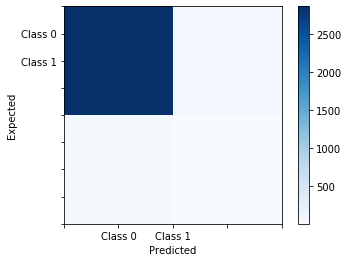

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat_smoke_tree = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_smoke)
print('Confusion matrix:\n', conf_mat_smoke_tree)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_tree, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

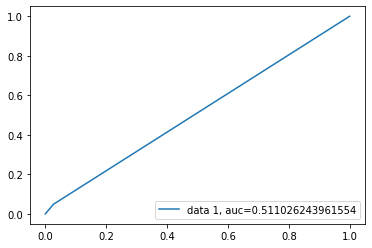

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_smoke)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_smoke)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_No_smoke_tree = DecisionTreeClassifier()
model_No_smoke_tree.fit(X_train_No_smoke,y_train_No_smoke)

y_pred_No_smoke = model_No_smoke_tree.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_No_smoke)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

Accuracy excluding smoking status: 97.14%


Confusion matrix:
 [[1290   21]
 [  17    1]]


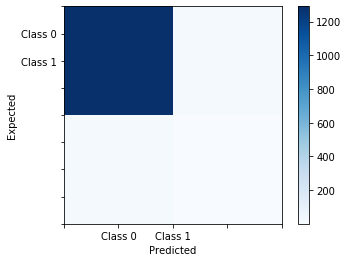

In [ ]:
conf_mat_No_smoke_tree = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_No_smoke)
print('Confusion matrix:\n', conf_mat_No_smoke_tree)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_tree, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

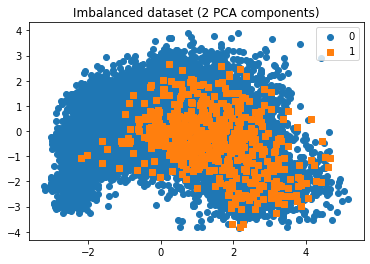

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_smoke_pca = pca.fit_transform(X_train_smoke)

plot_2d_space(X_train_smoke_pca, y_train_smoke, 'Imbalanced dataset (2 PCA components)')

In [ ]:
X_train_smoke_pca.shape

(27089, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



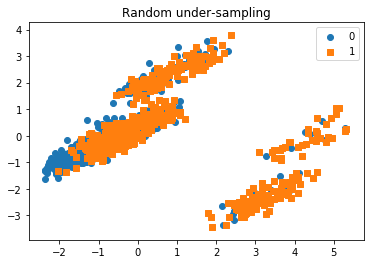

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)

X_rus, y_rus, id_rus = rus.fit_sample(X_train_smoke, y_train_smoke)

X_train_smoke_pca_RU = pca.fit_transform(X_rus)


plot_2d_space(X_train_smoke_pca_RU, y_rus, 'Random under-sampling')

In [ ]:
from collections import Counter

Counter(y_rus)

Counter({0: 577, 1: 577})

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 2500})
X_cc, y_cc = cc.fit_sample(X_train_smoke, y_train_smoke)

In [ ]:
Counter(y_cc)

Counter({0: 2500, 1: 577})

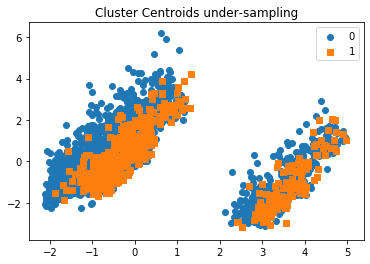

In [ ]:
X_train_smoke_pca_CC = pca.fit_transform(X_cc)
plot_2d_space(X_train_smoke_pca_CC, y_cc, 'Cluster Centroids under-sampling')

Accuracy excluding smoking status: 68.84%
Confusion matrix:
 [[2037  912]
 [  26   35]]


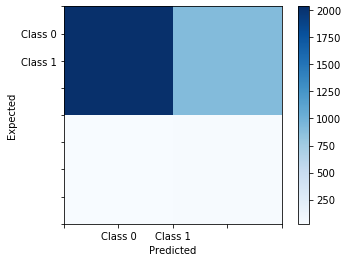

In [ ]:
model_smoke_tree_Undersampling = DecisionTreeClassifier()
model_smoke_tree_Undersampling.fit(X_cc, y_cc)

y_pred_smoke_Undersampling = model_smoke_tree_Undersampling.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_smoke_Undersampling)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_smoke_tree_Undersampling = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_smoke_Undersampling)
print('Confusion matrix:\n', conf_mat_smoke_tree_Undersampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_tree_Undersampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

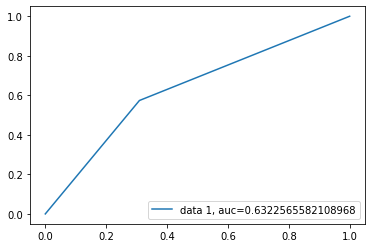

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_smoke_Undersampling)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_smoke_Undersampling)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model_smoke_boost_Undersampling = XGBClassifier()
model_smoke_boost_Undersampling.fit(X_cc, y_cc)

y_pred_smoke_boost_Undersampling = model_smoke_boost_Undersampling.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_smoke_boost_Undersampling)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.27%


Confusion matrix:
 [[2638  311]
 [  42   19]]


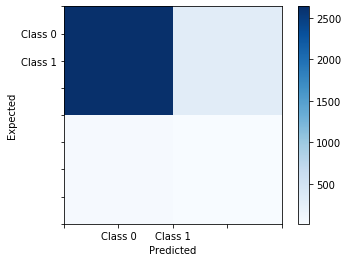

In [ ]:
conf_mat_smoke_boost_Undersampling = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_smoke_boost_Undersampling)
print('Confusion matrix:\n', conf_mat_smoke_boost_Undersampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_boost_Undersampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

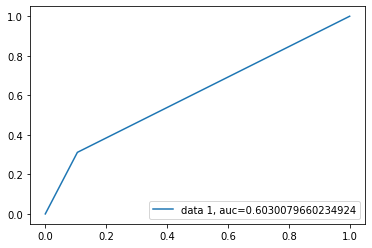

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_smoke_boost_Undersampling)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_smoke_boost_Undersampling)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
X_Cluster_centroid = pd.DataFrame(X_cc)
X_Cluster_centroid.head()

,0,1,2,3,4,5,6,7,8,9
0,1.253139,1.463510,-0.364243,-0.243137,0.577848,0.075564,0.994368,-0.135178,0.210392,-1.421353
1,1.253139,-0.426085,-0.364243,-0.243137,0.577848,0.075564,-1.005664,-0.550287,-0.433384,1.514336
2,-0.797996,0.527194,-0.364243,-0.243137,0.577848,0.075564,0.994368,-0.336098,1.014555,0.046492
3,1.253139,-1.560230,-0.364243,-0.243137,-1.730560,0.075564,0.994368,-0.517620,-1.108727,0.046492
4,-0.797996,-0.423765,-0.364243,-0.243137,0.577848,0.075564,-1.005664,0.423702,-1.065877,0.046492


In [ ]:
data_smoking_status.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
from imblearn.over_sampling import SMOTENC

smt = SMOTENC(categorical_features=[0,2,3,4,5,6,9],k_neighbors=4)
X_smoke_resample_train, y_smoke_resample_train = smt.fit_sample(X_cc, y_cc)

In [ ]:
Counter(y_smoke_resample_train)

Counter({0: 2500, 1: 2500})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



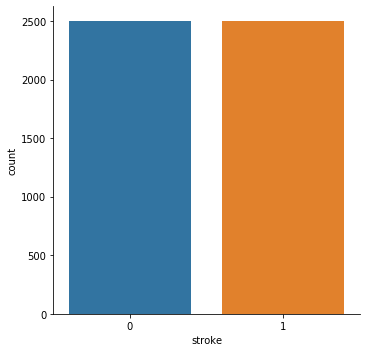

In [ ]:
y_ = pd.DataFrame(y_smoke_resample_train)
y_.rename(columns={0:'stroke'}, inplace=True)
resamp = pd.concat([pd.DataFrame(X_smoke_resample_train), y_], axis=1)
sns.factorplot(x='stroke', kind='count' ,data=resamp)
fig = plt.gcf()

Accuracy including smoking status: 71.20%
Confusion matrix:
 [[2112  837]
 [  30   31]]


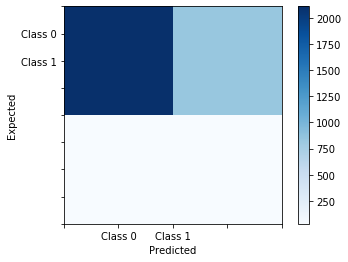

In [ ]:
model_smoke_tree_Resampling = DecisionTreeClassifier()
model_smoke_tree_Resampling.fit(X_smoke_resample_train, y_smoke_resample_train)

y_pred_smoke_Resampling = model_smoke_tree_Resampling.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_smoke_Resampling)
print("Accuracy including smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_smoke_tree_Resampling = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_smoke_Resampling)
print('Confusion matrix:\n', conf_mat_smoke_tree_Resampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_tree_Resampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

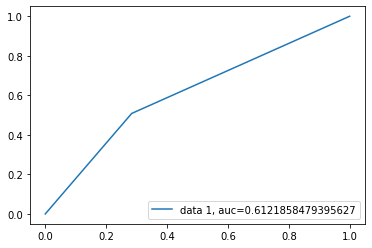

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_smoke_Resampling)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_smoke_Resampling)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy including smoking status: 70.00%
Confusion matrix:
 [[2068  881]
 [  22   39]]


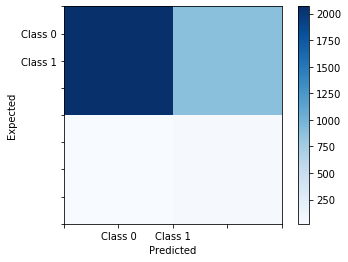

In [ ]:
from sklearn.svm import SVC
svclassifier_smoke = SVC(kernel='linear')
svclassifier_smoke.fit(X_smoke_resample_train, y_smoke_resample_train)

y_pred_svm_smoke = svclassifier_smoke.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_svm_smoke)
print("Accuracy including smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_smoke_svm_Resampling = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_svm_smoke)
print('Confusion matrix:\n', conf_mat_smoke_svm_Resampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_svm_Resampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

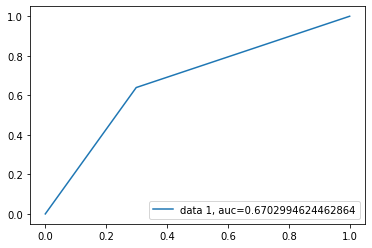

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_svm_smoke)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_svm_smoke)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = np.arange(1, 41, 2)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_smoke_resample_train, y_smoke_resample_train, param_name="max_depth", cv=10, 
    param_range=param_range,n_jobs=8,
    scoring="roc_auc")

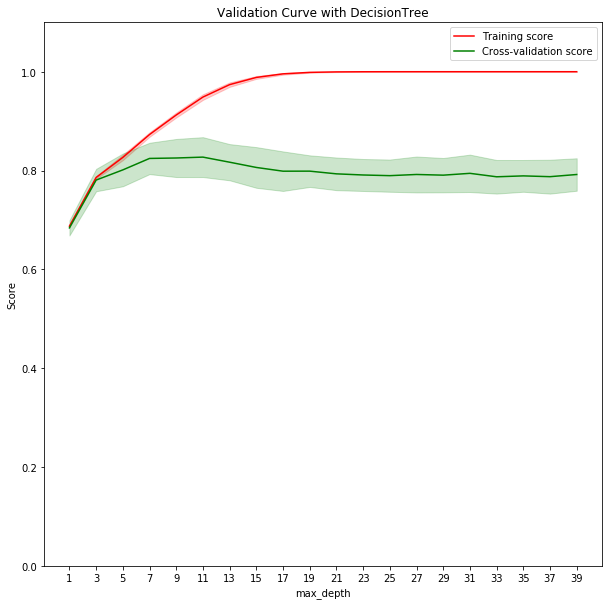

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

In [ ]:
param_range = ['linear','rbf','poly']
train_scores, test_scores = validation_curve(
    svm.SVC(C = 1.0), X_smoke_resample_train, y_smoke_resample_train, param_name="kernel", cv=10, 
    param_range=param_range,n_jobs=8,scoring="roc_auc")

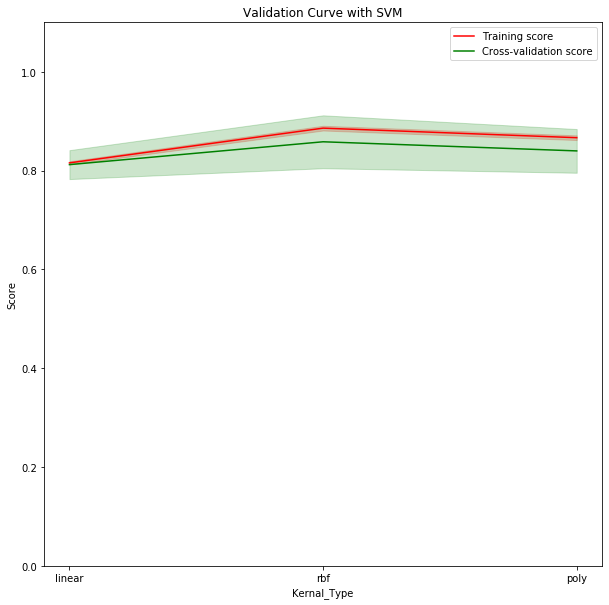

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with SVM")
plt.xlabel("Kernal_Type")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

Accuracy including smoking status: 70.00%
Confusion matrix:
 [[2068  881]
 [  22   39]]


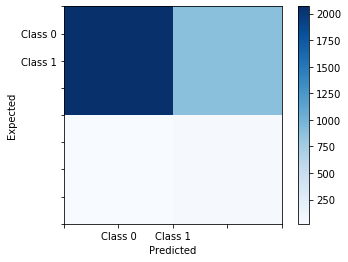

In [ ]:
from sklearn.svm import SVC
svclassifier_smoke_2 = SVC(kernel='linear',C = 1.0)
svclassifier_smoke_2.fit(X_smoke_resample_train, y_smoke_resample_train)

y_pred_svm_smoke_2 = svclassifier_smoke_2.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_svm_smoke_2)
print("Accuracy including smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_smoke_svm_Resampling_2 = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_svm_smoke_2)
print('Confusion matrix:\n', conf_mat_smoke_svm_Resampling_2)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_svm_Resampling_2, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

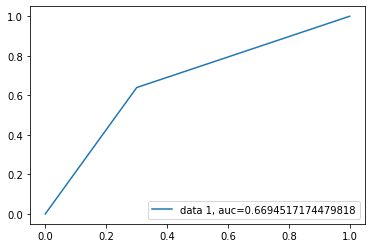

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_svm_smoke_2)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_svm_smoke_2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy including smoking status: 55.65%
Confusion matrix:
 [[1627 1322]
 [  13   48]]


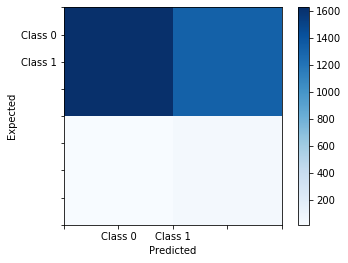

In [ ]:
model_smoke_tree_Resampling_2 = DecisionTreeClassifier(max_depth=7, criterion="gini")
model_smoke_tree_Resampling_2.fit(X_smoke_resample_train, y_smoke_resample_train)

y_pred_smoke_Resampling_2 = model_smoke_tree_Resampling_2.predict(X_test_smoke)

accuracy = accuracy_score(y_test_smoke, y_pred_smoke_Resampling_2)
print("Accuracy including smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_smoke_tree_Resampling = confusion_matrix(y_true=y_test_smoke, y_pred=y_pred_smoke_Resampling_2)
print('Confusion matrix:\n', conf_mat_smoke_tree_Resampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_smoke_tree_Resampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

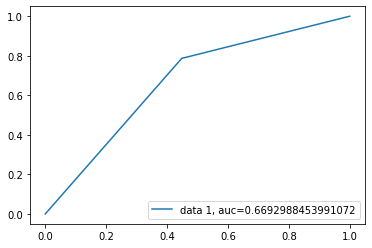

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_smoke,  y_pred_smoke_Resampling_2)
auc = metrics.roc_auc_score(y_test_smoke, y_pred_smoke_Resampling_2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_No_smoke_tree = DecisionTreeClassifier()
model_No_smoke_tree.fit(X_train_No_smoke,y_train_No_smoke)

y_pred_No_smoke = model_No_smoke_tree.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_No_smoke)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))


Accuracy excluding smoking status: 97.82%


In [ ]:
Counter(y_train_No_smoke)

Counter({0: 11834, 1: 127})

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc_No_smoke = ClusterCentroids(ratio={0: 2500})
X_cc_No_smoke, y_cc_No_smoke = cc_No_smoke.fit_sample(X_train_No_smoke,y_train_No_smoke)

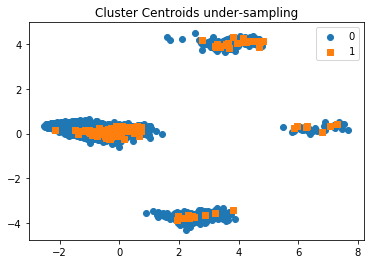

In [ ]:
X_train_No_smoke_pca_CC = pca.fit_transform(X_cc_No_smoke)
plot_2d_space(X_train_No_smoke_pca_CC, y_cc_No_smoke, 'Cluster Centroids under-sampling')

Accuracy excluding smoking status: 94.88%
Confusion matrix:
 [[1258   53]
 [  15    3]]


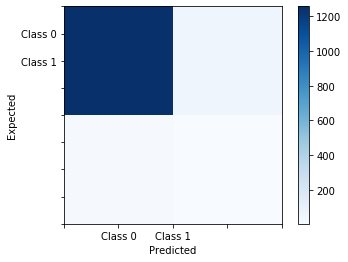

In [ ]:
model_No_smoke_tree_Undersampling = DecisionTreeClassifier()
model_No_smoke_tree_Undersampling.fit(X_cc_No_smoke, y_cc_No_smoke)

y_pred_No_smoke_Undersampling = model_No_smoke_tree_Undersampling.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_No_smoke_Undersampling)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_No_smoke_tree_Undersampling = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_No_smoke_Undersampling)
print('Confusion matrix:\n', conf_mat_No_smoke_tree_Undersampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_tree_Undersampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

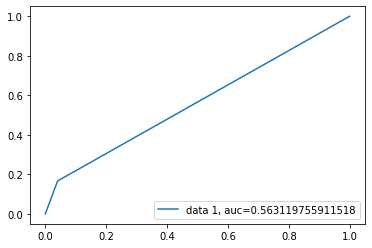

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_No_smoke,  y_pred_No_smoke_Undersampling)
auc = metrics.roc_auc_score(y_test_No_smoke, y_pred_No_smoke_Undersampling)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
Counter(y_cc_No_smoke)

Counter({0: 2500, 1: 127})

In [ ]:
pd.DataFrame(data_smoking_status).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
from imblearn.over_sampling import SMOTENC

smt_No_smoke = SMOTENC(categorical_features=[0,2,3,4,5,6],k_neighbors=4)
X_No_smoke_resample_train, y_No_smoke_resample_train = smt_No_smoke.fit_sample(X_cc_No_smoke, y_cc_No_smoke)

Accuracy excluding smoking status: 90.67%
Confusion matrix:
 [[1201  110]
 [  14    4]]


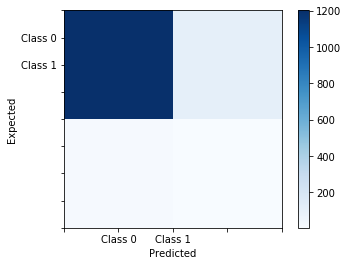

In [ ]:
model_No_smoke_tree_Resampling = DecisionTreeClassifier()
model_No_smoke_tree_Resampling.fit(X_No_smoke_resample_train, y_No_smoke_resample_train)

y_pred_No_smoke_Resampling = model_No_smoke_tree_Resampling.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_No_smoke_Resampling)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_No_smoke_tree_Resampling = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_No_smoke_Resampling)
print('Confusion matrix:\n', conf_mat_No_smoke_tree_Resampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_tree_Resampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

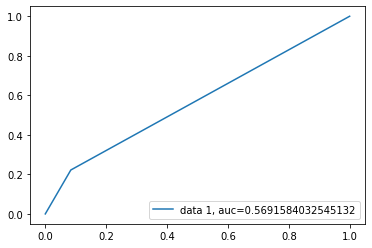

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_No_smoke,  y_pred_No_smoke_Resampling)
auc = metrics.roc_auc_score(y_test_No_smoke, y_pred_No_smoke_Resampling)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy excluding smoking status: 81.04%
Confusion matrix:
 [[1065  246]
 [   6   12]]


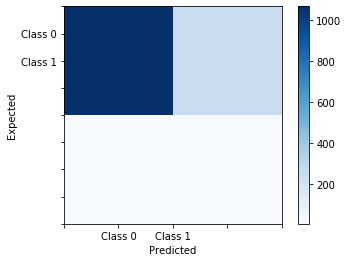

In [ ]:
from sklearn.svm import SVC
svclassifier_No_smoke = SVC(kernel='linear')
svclassifier_No_smoke.fit(X_No_smoke_resample_train, y_No_smoke_resample_train)

y_pred_svm_No_smoke = svclassifier_No_smoke.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_svm_No_smoke)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_No_smoke_svm_Resampling = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_svm_No_smoke)
print('Confusion matrix:\n', conf_mat_No_smoke_svm_Resampling)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_svm_Resampling, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

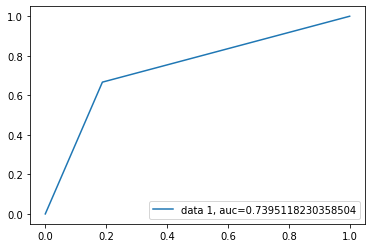

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_No_smoke,  y_pred_svm_No_smoke)
auc = metrics.roc_auc_score(y_test_No_smoke, y_pred_svm_No_smoke)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = np.arange(1, 41, 2)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_No_smoke_resample_train, y_No_smoke_resample_train, param_name="max_depth", cv=10, 
    param_range=param_range,n_jobs=8,
    scoring="recall")

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

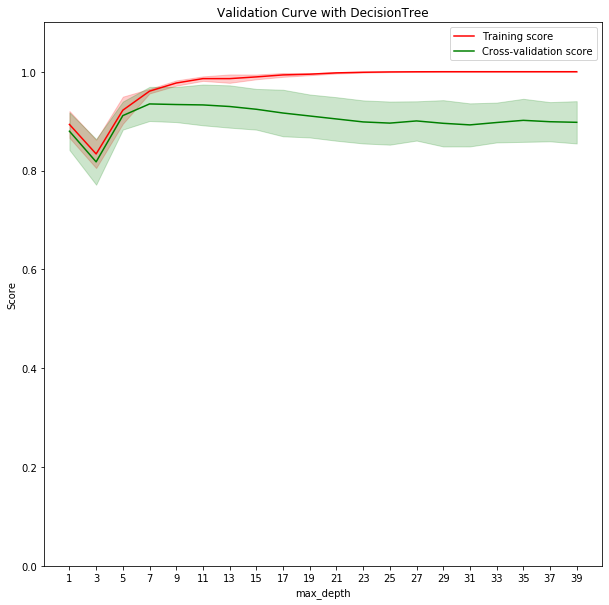

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

In [ ]:
param_range = ['linear','rbf','poly']
train_scores, test_scores = validation_curve(
    svm.SVC(C = 1.0), X_No_smoke_resample_train, y_No_smoke_resample_train, param_name="kernel", cv=10, 
    param_range=param_range,n_jobs=8,scoring="roc_auc")

NameError: ignored

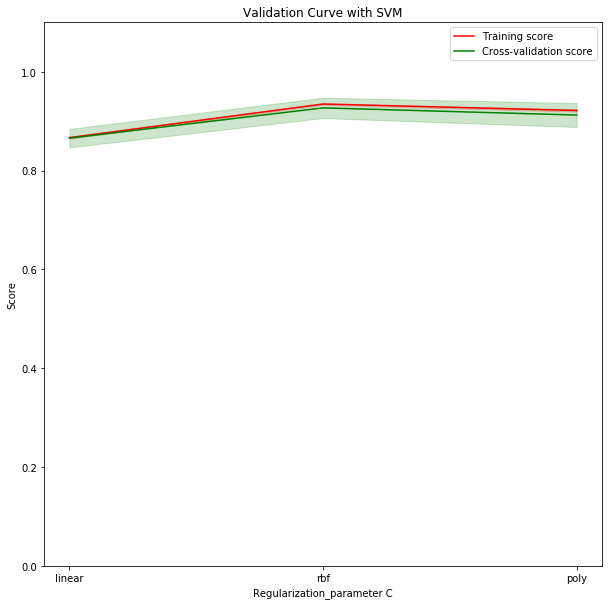

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10,10))
plt.title("Validation Curve with SVM")
plt.xlabel("Regularization_parameter C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

Accuracy excluding smoking status: 82.84%
Confusion matrix:
 [[1088  223]
 [   5   13]]


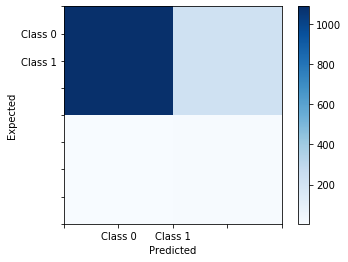

In [ ]:
model_No_smoke_tree_Resampling_2 = DecisionTreeClassifier(max_depth=7, criterion="gini")
model_No_smoke_tree_Resampling_2.fit(X_No_smoke_resample_train, y_No_smoke_resample_train)

y_pred_No_smoke_Resampling_2 = model_No_smoke_tree_Resampling_2.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_No_smoke_Resampling_2)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_No_smoke_tree_Resampling_2 = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_No_smoke_Resampling_2)
print('Confusion matrix:\n', conf_mat_No_smoke_tree_Resampling_2)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_tree_Resampling_2, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

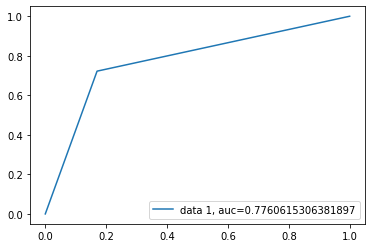

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_No_smoke,  y_pred_No_smoke_Resampling_2)
auc = metrics.roc_auc_score(y_test_No_smoke, y_pred_No_smoke_Resampling_2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy excluding smoking status: 81.04%
Confusion matrix:
 [[1065  246]
 [   6   12]]


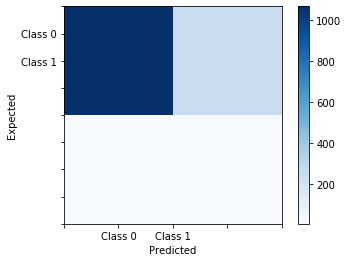

In [ ]:
from sklearn.svm import SVC
svclassifier_No_smoke_2 = SVC(kernel='linear',C = 1.0)
svclassifier_No_smoke_2.fit(X_No_smoke_resample_train, y_No_smoke_resample_train)

y_pred_svm_No_smoke_2 = svclassifier_No_smoke_2.predict(X_test_No_smoke)

accuracy = accuracy_score(y_test_No_smoke, y_pred_svm_No_smoke_2)
print("Accuracy excluding smoking status: %.2f%%" % (accuracy * 100.0))

conf_mat_No_smoke_svm_Resampling_2 = confusion_matrix(y_true=y_test_No_smoke, y_pred=y_pred_svm_No_smoke_2)
print('Confusion matrix:\n', conf_mat_No_smoke_svm_Resampling_2)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(conf_mat_No_smoke_svm_Resampling_2, cmap=plt.cm.Blues, )
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

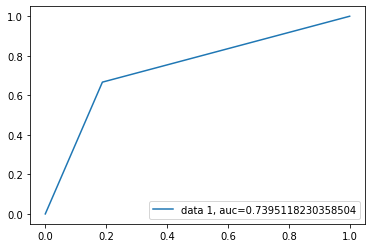

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_No_smoke,  y_pred_svm_No_smoke_2)
auc = metrics.roc_auc_score(y_test_No_smoke, y_pred_svm_No_smoke_2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()